In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file and print the first few rows of the data
df=pd.read_csv('space server.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#print the number of rows and columns
df.shape

#here the number of rows are 10000 and columns are 18

(10000, 18)

In [4]:
#print the concise summary of the dataframe
df.info()

#info function tells us about the datatypes and the number of non null values; here there are 10 float values,7 integer values and an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
#print the data types of the columns of the dataset
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [6]:
#print unique values in class
df['class'].unique()

#in this dataset class is the target variable and the data is classified as star, galaxy and quasar.

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [7]:
#count the unique values
df['class'].value_counts()

#count the number of galaxy,star and qso

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [8]:
#lets check the null values
df.isnull().sum()

#there are no null values in the dataset

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

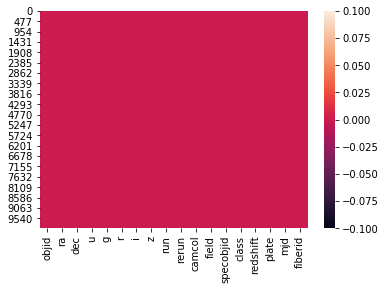

In [9]:
#there are no null values; lets check using heatmap too
sns.heatmap(df.isnull())

In [10]:
#using describe function, we can understand the statistical features
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain 10000 entries.

mean- Mean of Values here mean of each column is found ie, mean of dec column= 14.836, g is 17.371931 etc

std- Standard Deviation of the Values here standard deviation for dec is 25.212207, g is 0.945457 etc

min- Minimum value here it shows the min value for ra is 8.235100 , for u is 12.988970 etc

max- Maximum value it shows the max value for ra is 260.884382, for u is 19.5999 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for ra it is 157.370, 180.3945 , and 201.547279 respectively

In [11]:
#lets check the correlation
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


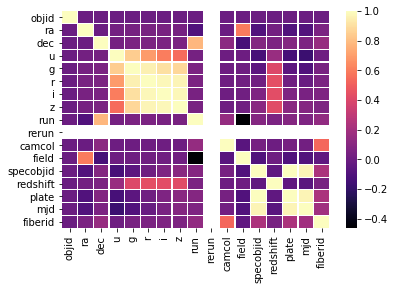

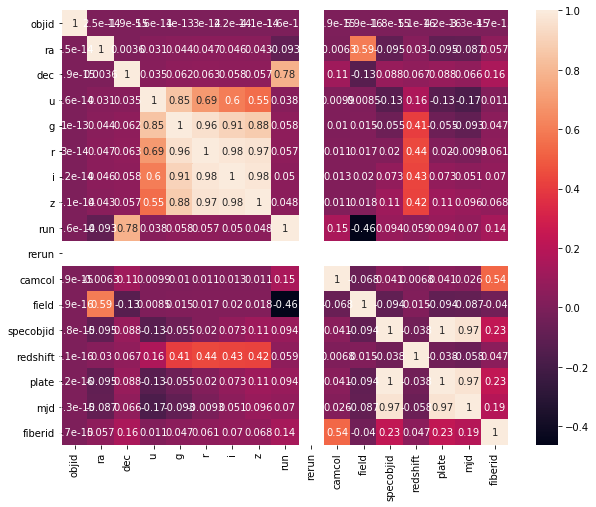

In [12]:
#heatmap of correlation
correlation = df.corr()
sns.heatmap(correlation,cmap='magma',linecolor='white',linewidths=.1)

corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

#we can see that there is more strong correlation among the variables

In [13]:
correlation = df.corr(method='pearson')
correlation.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02


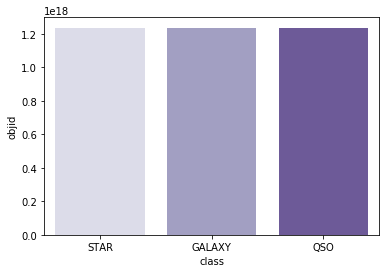

In [14]:
sns.barplot(x='class',y='objid',data=df,palette='Purples')

#lets use seaborn to show the relation between the target variable class and the variable objid;

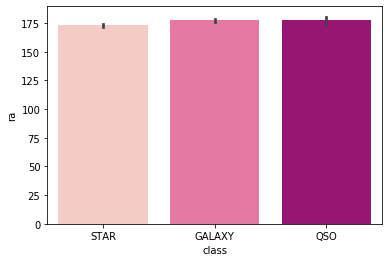

In [15]:
sns.barplot(x='class',y='ra',data=df,palette='RdPu')
#lets use seaborn to show the relation between the target variable class and the variable ra

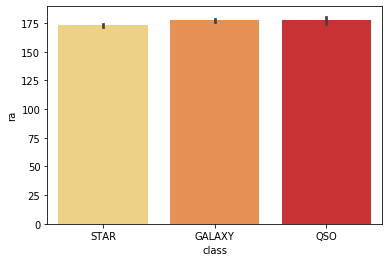

In [16]:
sns.barplot(x='class',y='ra',data=df,palette='YlOrRd')

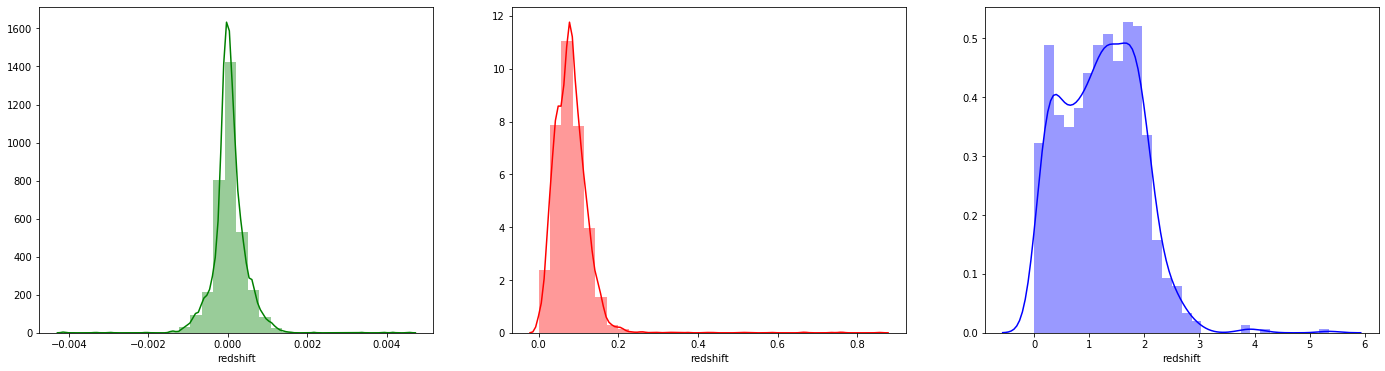

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')
plt.show()

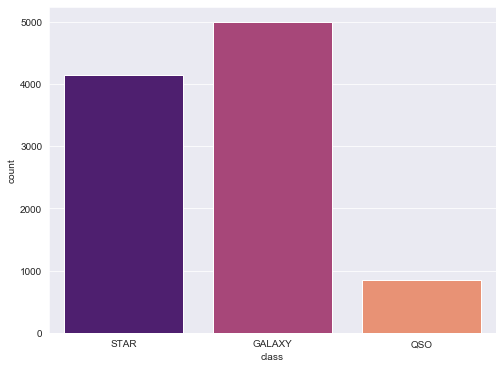

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')
#this shows that there are more number of galaxy , followed by star  and the least is qso

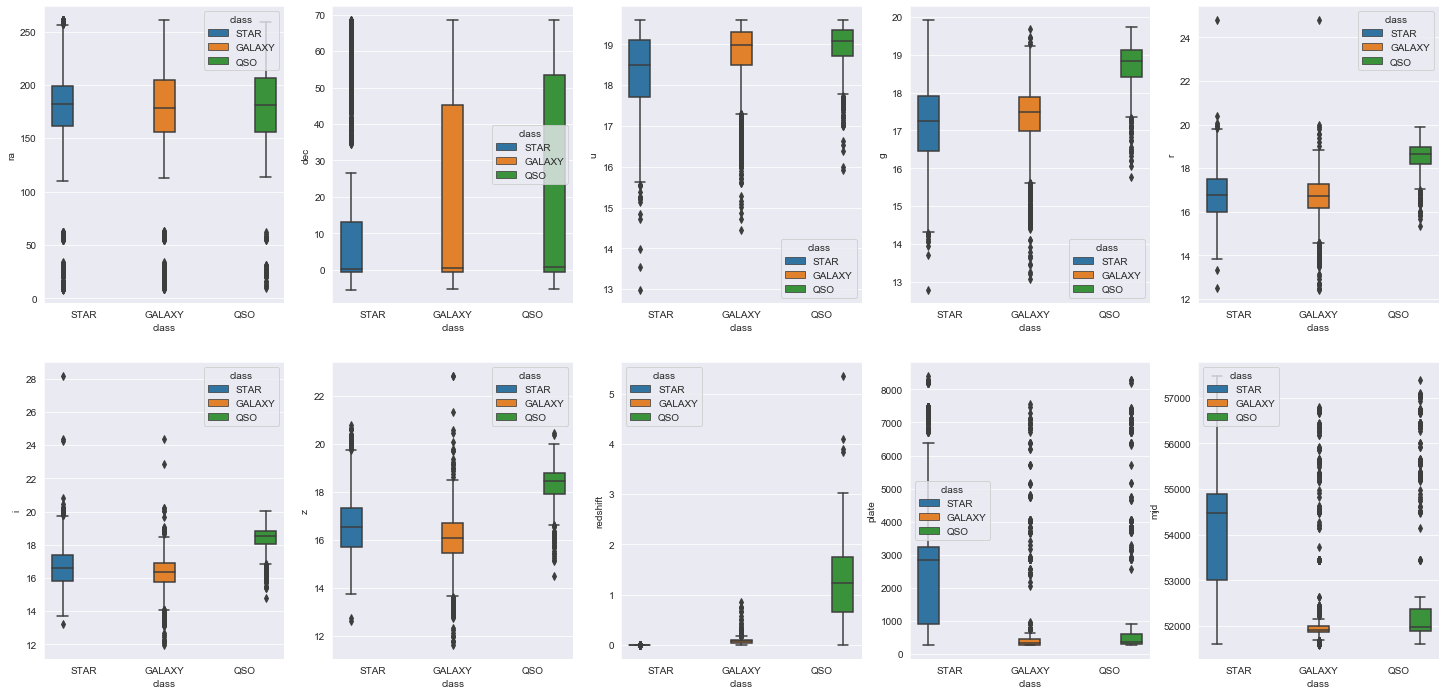

In [19]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df)
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'redshift', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

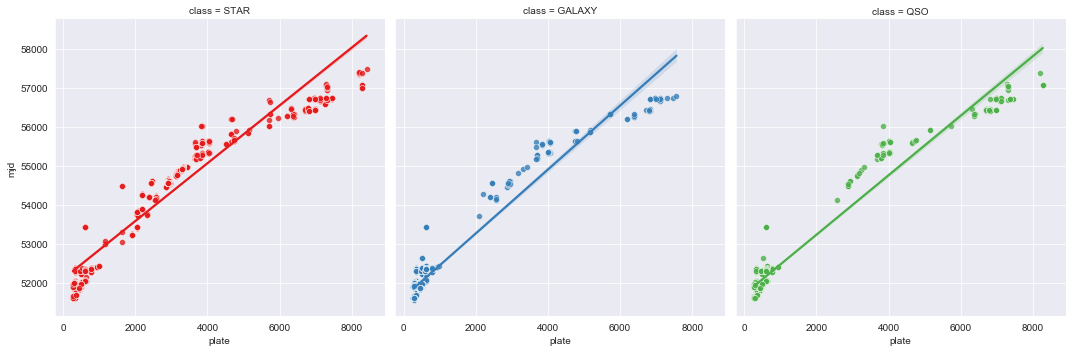

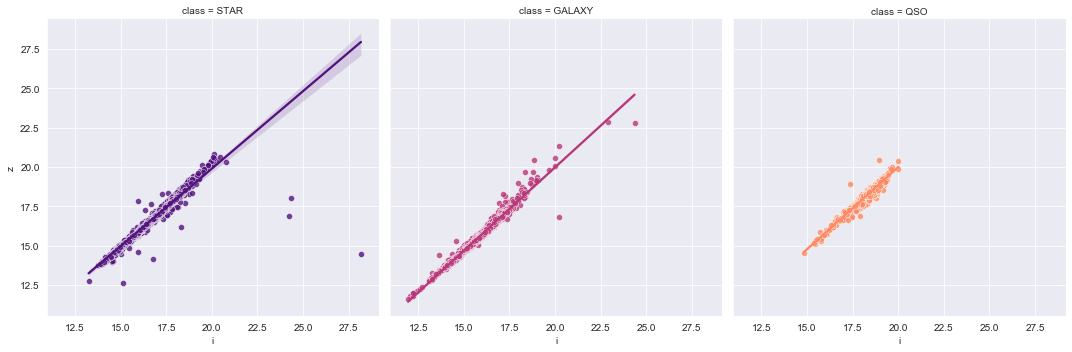

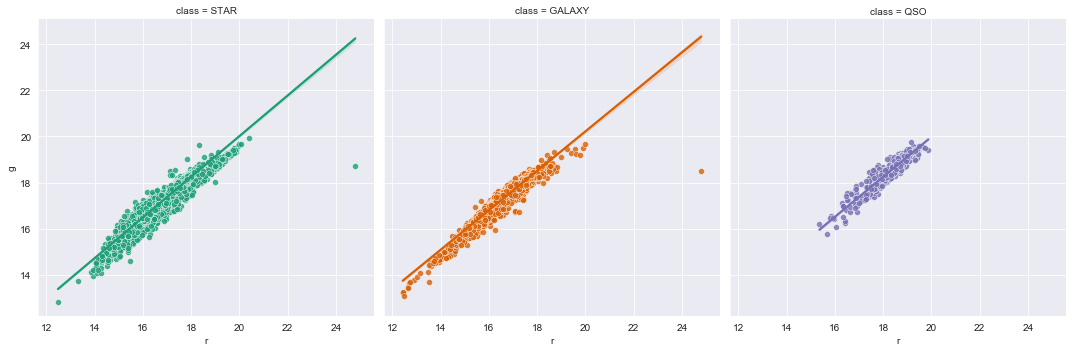

In [20]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

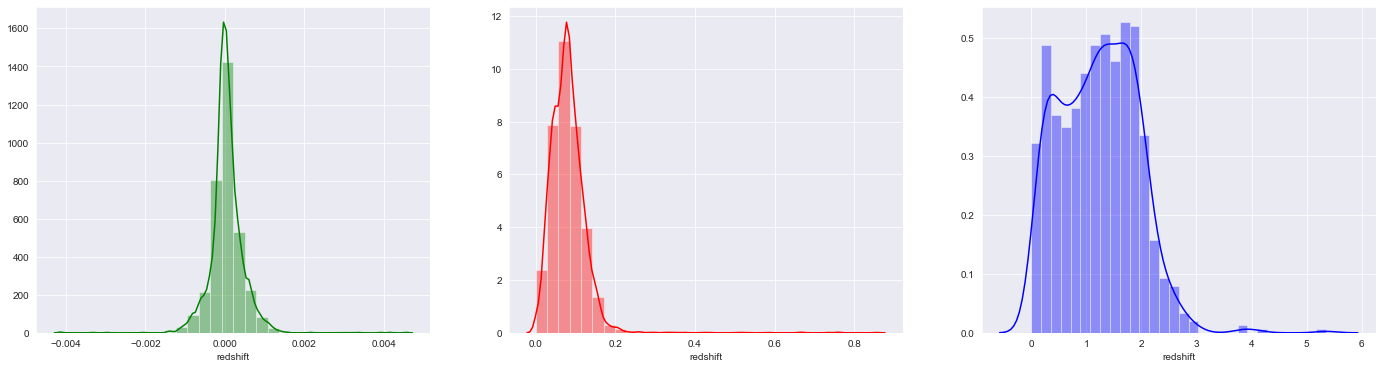

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')

In [22]:
#Data Engineering
#Encoding class labels into integers

labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


Dimension Reduction using PCA

As we saw in heatmap of correlation that features u, g, r, i, z are highly correlating so we will use PCA on them and reduce 5 features to 3 features for better accuracy.

In [23]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [24]:
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df[['u', 'g', 'r', 'i', 'z']])

df = pd.concat((df, pd.DataFrame(df_pca)), axis = 1)
df.rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
df.drop(['u', 'g', 'r', 'i', 'z'], axis = 1, inplace = True)
df.head(3)

,objid,ra,dec,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,F1,F2,F3
0,1.237650e+18,183.531326,0.089693,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,1.237650e+18,183.598371,0.135285,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,1.237650e+18,183.680207,0.126185,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513,1.297604,-0.590023,0.140338


In [25]:
#Data separation into features and labels

X = df.drop('class', axis = 1).values
y = df['class'].values

#since the target variable is in categorical nature we can use logistic regression as a model

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [27]:
#Due to the presence of outliers we have to scale the data. Here we will be using Robust scaler function

robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

MACHINE LEARNING MODELS

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=26)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=26)
GBC=GradientBoostingClassifier(random_state=26)
ABC=AdaBoostClassifier(random_state=26)
ETC=ExtraTreesClassifier(random_state=26)

In [29]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [31]:
#Logistic Regression
lr = LogisticRegression(max_iter=120)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1215
           2       0.99      0.98      0.98      1519
           3       0.96      0.95      0.96       266

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1213    0    2]
 [  28 1483    8]
 [   1   11  254]]
Training Score:  0.9871428571428571
Testing Score:  0.9833333333333333


In [32]:
#Support Vector Classification
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99      1215
           2       0.99      0.97      0.98      1519
           3       0.97      0.98      0.97       266

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1212    3    0]
 [  31 1479    9]
 [   1    5  260]]
Training Score:  0.9865714285714285
Testing Score:  0.9836666666666667


In [33]:
#Decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1215
           2       0.99      0.99      0.99      1519
           3       0.95      0.97      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [   3 1502   14]
 [   1    8  257]]
Training Score:  1.0
Testing Score:  0.9906666666666667


In [34]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       0.99      0.98      0.99      1519
           3       0.96      0.97      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1496   12]
 [   1    7  258]]
Training Score:  1.0
Testing Score:  0.989


In [35]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       1.00      0.98      0.99      1519
           3       0.95      0.98      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1493   15]
 [   1    4  261]]
Training Score:  1.0
Testing Score:  0.989


In [36]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
0               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       1.00      0.98      0.99      1519
           3       0.95      0.98      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1493   15]
 [   1    4  261]]
Training Score:  0.9998571428571429
Testing Score:  0.9913333333333333


In [37]:
#KNN
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [38]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      1215
           2       0.98      0.96      0.97      1519
           3       0.97      0.97      0.97       266

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix: 
 [[1184   30    1]
 [  49 1462    8]
 [   1    7  258]]
Training Score:  0.9765714285714285
Testing Score:  0.968


From the above we can understand that the Gradient Boosting Classifier gives the max accuracy - 99%. 
Hence I chose this model for the dataset.

In [39]:
#save the model
from sklearn.externals import joblib

joblib.dump(gdb,'Model_SpaceServer.pkl')

['Model_SpaceServer.pkl']